# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import Libs.
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer



In [45]:
# Load the Twitter archive data from a CSV file into a DataFrame

archive = pd.read_csv('twitter-archive-enhanced.csv')

#archive.head()

In [46]:
# Download and save image predictions data, then load it into a DataFrame

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

#prediction.head()

In [47]:
### UDACITY CODE!

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'OAuthHandler' is not defined

In [48]:
# Read the tweet data from a JSON
tweet_json = pd.read_json('tweet-json.txt' , lines=True )

tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## twitter_archive_enhanced.csv

In [49]:
# Explore and analyze various aspects of the Twitter archive data

archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [51]:
archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Daisy               7
Bailey              7
Buddy               7
Toby                7
an                  7
Koda                6
Scout               6
Milo                6
Oscar               6
Bella               6
Jax                 6
Stanley             6
Dave                6
Jack                6
Rusty               6
Leo                 6
George              5
                 ... 
Monty               1
Timofy              1
Steve               1
Huxley              1
Edmund              1
Scruffers           1
Arnold              1
Michelangelope      1
Longfellow          1
Mona                1
Kawhi               1
Jett                1
Alfy                1
Darrel              1
Petrick   

In [52]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [53]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [54]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
sum(archive.tweet_id.duplicated())

0

## image_predictions.tsv

In [58]:
# Explore and check for duplicates in the image predictions data

prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [59]:
prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [60]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
sum(prediction.tweet_id.duplicated())

0

In [62]:
sum(prediction.jpg_url.duplicated())

66

### Quality Issues

#### In 'archive' and 'tweet_json'

1. Many values are named "None" instead of NaN.

#### In 'archive'

2. The doggo, floofer, pupper, and puppo columns should have True/False values instead of null/non-null values.

3. The "timestamp" column has the wrong datatype (object instead of datetime).

4. There are retweets and replies that act as duplicate data (as indicated by the "retweeted_status_timestamp" and "in_reply_to_status_id" columns); these should be removed.

#### In 'tweet_json'

5. All rows in the "retweeted" column are marked "False" despite a few non-null values in the "retweeted_status" column, indicating incorrect data.

6. There are many unnecessary columns: display_text_range, entities, extended_entities, favorited, full_text, id_str, is_quote_status, lang, possibly_sensitive, possibly_sensitive_appealable, truncated, user.

#### In 'archive' and 'tweet_json'

7. There are many empty or nearly empty columns. The "retweeted_status_timestamp" column in 'archive' and the "retweeted_status" column in 'tweet_json' are useful when removing retweets, so they should be removed after steps *4* and _5_ are completed.

   - Empty/nearly empty columns in 'archive': in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
   - Empty/nearly empty columns in 'tweet_json': contributors, coordinates, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, quoted_status, quoted_status_id, quoted_status_id_str, retweeted_status.

#### All dataframes (to be cleaned after tidiness issues)

8. The three dataframes should be merged together to make the data easier to understand.

9. After merging, there will be some duplicated columns.

### Tidiness Issues

1. In 'archive', the doggo, floofer, pupper, and puppo columns should all be merged into a single column.

2. There are inconsistent ID names across different dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [63]:
# Make copies of original pieces of data
clean_archive = archive.copy()
clean_prediction = prediction.copy()
clean_tweet_json = tweet_json.copy()

### Issue #1:

#### In 'archive' and 'tweet_json'


1. Many values named "None" instead of NaN. (Quality issue)

#### Define: Replace "None" with "NaN".

#### Code

In [64]:
clean_archive.replace(to_replace='None', value=np.nan, inplace=True)
clean_tweet_json.replace(to_replace=[None], value=np.nan, inplace=True)

#### Test

In [65]:
clean_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,NaN,NaN,NaN,NaN,NaN


In [66]:
clean_tweet_json.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2277,NaN,NaN,2015-11-19 18:13:27,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667405337926832129, 'id_str'...",489,False,This is Biden. Biden just tripped... 7/10 http...,NaN,...,0.0,NaN,NaN,NaN,234,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #2:
#### In 'archive'


2. The doggo, floofer, pupper and puppo columns should have True/False values instead null/non null values. (Quality issue)

#### Define: Change the columns to have True/False using a for loop

#### Code

In [67]:
columns= ["doggo", "floofer", "pupper", "puppo"]
for col in columns:
    clean_archive[col] = clean_archive[col].notna()

This code sees if the value is equal to it's own non NaN value, if it's True then it isn't a NaN value, if it's False then it is.

#### Test

In [68]:
clean_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,False,False,False,False


In [69]:
clean_archive[columns].dtypes

doggo      bool
floofer    bool
pupper     bool
puppo      bool
dtype: object

We can see here that the columns are now bool, which is more proof that the issue is fixed.

### Issue #3:
#### In 'archive'


3. The "timestamp" column has the wrong datatype (object instead of datetime). (Quality issue)

#### Define: Change it to datetime using the pd.to_datetime()

#### Code

In [70]:
clean_archive["timestamp"] = pd.to_datetime(clean_archive["timestamp"])

#### Test

In [71]:
clean_archive["timestamp"].dtype

dtype('<M8[ns]')

### Issue #4:
#### In 'archive'



There are retweets that act as duplicate data (We know this from the "retweeted_status_timestamp" and "in_reply_to_status_id" columns); they should be dropped. (Quality issue)

#### Define:
Drop the non NaN values in the "retweeted_status_timestamp" column

#### Code

In [72]:
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]
clean_archive = clean_archive[clean_archive.in_reply_to_status_id.isnull()]

#### Test

In [73]:
clean_archive['retweeted_status_timestamp'].notna().sum()

0

In [74]:
clean_archive['in_reply_to_status_id'].notna().sum()

0

In [75]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         2097 non-null bool
floofer                       2097 non-null bool
pupper                        2097 non-null bool
puppo                         2097 non-null bool
dtypes: bool(4), datetime64[ns](1), floa

We can see here that all the non NaN values in both columns are removed, which means that the issue is solved.

### Issue #5: In 'tweet_json'
All the rows on the "retweeted" column are marked "False" despite there being a few non null values at the "retweeted_status" coulumn (Data is incorrect). (Quality issue)

#### Define:
Make the rows with non null value at the "retweeted_status" coulumn have "True" instead of "False" in the "retweeted" columns

#### Code

In [76]:
clean_tweet_json.loc[clean_tweet_json['retweeted_status'].notna(), 'retweeted'] = True

#### Test

In [77]:
clean_tweet_json.loc[clean_tweet_json['retweeted'] == True].head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,0.0,NaN,8.860534e+17,8.860534e+17,108,True,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,0.0,NaN,NaN,NaN,19297,True,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,7181,True,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1349,True,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6965,True,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


We can see here that the rows with non NaN values at the "retweeted_status column" also have "True" in the "retweeted" column, which means the issue is fixed.

### Issue #6:
#### In 'tweet_json'
Lots of unnecessary columns (Quality issue)
unnecessary columns: display_text_range, entities, extended_entities, favorited, full_text, id_str, is_quote_status, lang, possibly_sensitive, possibly_sensitive_appealable, truncated, user

#### Define:
Remove the columns


#### Code

In [78]:
removed_columns = ["display_text_range", "entities", "extended_entities", "favorited", "full_text", "id_str", "is_quote_status", "lang", "possibly_sensitive", "possibly_sensitive_appealable", "truncated", "user"]
clean_tweet_json = clean_tweet_json.drop(columns=removed_columns)

#### Test

In [79]:
clean_tweet_json.head()

,contributors,coordinates,created_at,favorite_count,geo,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,place,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source
0,NaN,NaN,2017-08-01 16:23:56,39467,NaN,892420643555336193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
1,NaN,NaN,2017-08-01 00:17:27,33819,NaN,892177421306343426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2,NaN,NaN,2017-07-31 00:18:03,25461,NaN,891815181378084864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
3,NaN,NaN,2017-07-30 15:58:51,42908,NaN,891689557279858688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
4,NaN,NaN,2017-07-29 16:00:24,41048,NaN,891327558926688256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r..."


### Issue #7:
#### In 'archive' and 'tweet_json'


Lots of empty or almost empty columns (Quality issue)

Empty/almost empty columns in 'archive': in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

Empty/almost empty columns in 'tweet_json': contributors, coordinates, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, quoted_status, quoted_status_id, quoted_status_id_str, retweeted_status

#### Define:
Drop the columns

#### Code

In [80]:
empty_columns1 = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
empty_columns3 = ["contributors", "coordinates", "geo", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place", "quoted_status", "quoted_status_id", "quoted_status_id_str", "retweeted_status"]
clean_archive = clean_archive.drop(columns=empty_columns1)
clean_tweet_json = clean_tweet_json.drop(columns=empty_columns3)

#### Test

In [81]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,False,False
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,False,False
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,False,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,False,False


In [82]:
clean_tweet_json.head()

,created_at,favorite_count,id,retweet_count,retweeted,source
0,2017-08-01 16:23:56,39467,892420643555336193,8853,False,"<a href=""http://twitter.com/download/iphone"" r..."
1,2017-08-01 00:17:27,33819,892177421306343426,6514,False,"<a href=""http://twitter.com/download/iphone"" r..."
2,2017-07-31 00:18:03,25461,891815181378084864,4328,False,"<a href=""http://twitter.com/download/iphone"" r..."
3,2017-07-30 15:58:51,42908,891689557279858688,8964,False,"<a href=""http://twitter.com/download/iphone"" r..."
4,2017-07-29 16:00:24,41048,891327558926688256,9774,False,"<a href=""http://twitter.com/download/iphone"" r..."


### Issue #8:
In 'archive' the doggo, floofer, pupper and puppo columns should all be merged into one coulumn. (Tideness issue)

#### Define:


#### Code

In [83]:
Merged_columns = ['doggo', 'floofer', 'pupper', 'puppo']
clean_archive['age_level'] = clean_archive[Merged_columns].apply(lambda x: ', '.join(col for col in Merged_columns if x[col]), axis=1)
clean_archive['age_level'] = clean_archive['age_level'].replace('', np.nan)
clean_archive = clean_archive.drop(columns= Merged_columns)

#### Test

In [84]:
clean_archive.loc[clean_archive['age_level'].notna()].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


We can see here that the columns have been merged into one.

### Issue #9:
Inconsistent ID names across different dataframes. (Tideness issue)

#### Define:
Make all the ID columns' names' "tweet_id"

#### Code

In [85]:
clean_tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [86]:
clean_tweet_json.head()

,created_at,favorite_count,tweet_id,retweet_count,retweeted,source
0,2017-08-01 16:23:56,39467,892420643555336193,8853,False,"<a href=""http://twitter.com/download/iphone"" r..."
1,2017-08-01 00:17:27,33819,892177421306343426,6514,False,"<a href=""http://twitter.com/download/iphone"" r..."
2,2017-07-31 00:18:03,25461,891815181378084864,4328,False,"<a href=""http://twitter.com/download/iphone"" r..."
3,2017-07-30 15:58:51,42908,891689557279858688,8964,False,"<a href=""http://twitter.com/download/iphone"" r..."
4,2017-07-29 16:00:24,41048,891327558926688256,9774,False,"<a href=""http://twitter.com/download/iphone"" r..."


### Issue #10:
The three dataframes should all be merged together to make everything easier to understand. (Quality issue)


#### Define:
Merge the 3 dataframes using the "pd.merge()" function

#### Code

In [87]:
clean_df = pd.merge(clean_archive, clean_prediction, on='tweet_id', how='inner')
clean_df = pd.merge(clean_df, clean_tweet_json, on='tweet_id', how='inner')

#### Test

In [88]:
clean_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count,retweeted,source_y
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56,39467,8853,False,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27,33819,6514,False,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03,25461,4328,False,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51,42908,8964,False,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24,41048,9774,False,"<a href=""http://twitter.com/download/iphone"" r..."


### Issue #11:
Duplicated columns after merging the data. (Quality issue)

#### Define:
Remove the duplicated columns

#### Code

In [89]:
duplicated_columns= ["source_y", "created_at"]
clean_df = clean_df.drop(columns=duplicated_columns)
clean_df.rename(columns={'source_x': 'source'}, inplace=True)

#### Test

In [90]:
clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,False
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,False
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
# Save the final DataFrame to a CSV file with UTF-8 encoding

clean_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,False
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,False
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,False


Let's determine which dog has the highest rating, favorite count, and retweet count.

In [93]:
topdog = clean_df.nlargest(1, 'rating_numerator')
favdog = clean_df.nlargest(1, 'favorite_count')
retweetdog = clean_df.nlargest(1, 'retweet_count')

topdog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted
722,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,5569,2772,False


In [94]:
favdog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted
306,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810,48265,False


In [95]:
retweetdog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_level,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted
769,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,True,ice_bear,0.044681,False,whippet,0.018442,True,131075,79515,False


From the previous row, we find that the dog with the highest number of retweets is a doggo, with a total of 79,515 retweets.

Let's find out what the most common dog type is for each attempt by the machine.

In [96]:
mc1 = clean_df['p1'].mode()[0]
mc2 = clean_df['p2'].mode()[0]
mc3 = clean_df['p3'].mode()[0]
mc1

'golden_retriever'

In [97]:
mc2

'Labrador_retriever'

In [98]:
mc3

'Labrador_retriever'

Based on the previous three cells, it appears that the most frequently featured dog type on the WeRateDogs Twitter account is likely a Golden Retriever or Labrador Retriever.

Let's find  out the most common source from the WeRateDogs twitter account.

In [99]:
sources1 = clean_df['source'].value_counts()
sources1

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [100]:
clean_df['source'] = clean_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
clean_df['source'] = clean_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
clean_df['source'] = clean_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


In [101]:
sources2 = clean_df['source'].value_counts()
sources2

iPhone                1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

That tidiness issue was addressed in the "Analyzing and Visualizing Data" step because:

1. It was identified during the analyzing stage, not the assessing stage.
2. It highlights a key aspect of data wrangling: **the ability to reiterate**.

### Insights:

1. The highest-rated dog is Atticus, with a rating of 1776/10. The dog with the highest favorite count is a puppo, with 132,810 favorites. The dog with the highest number of retweets is a doggo, with 79,515 retweets.

2. The most frequently featured type of dog on the WeRateDogs Twitter account is likely a Golden Retriever or Labrador Retriever.

3. The most common medium used for tweets by the WeRateDogs Twitter account is iPhone.

### Visualization

We will use a pie chart to compare the values in the "source" column. To ensure the data is easy to read, we will add a **legend** that explains each segment of the pie chart. Additionally, we will include a percentage for each value in the legend, which will require the use of the "zip" function.

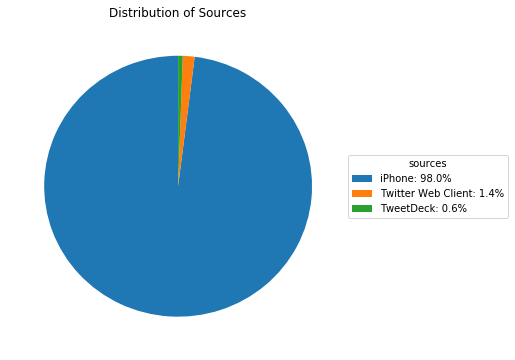

In [102]:
percentages = 100 * sources2 / sources2.sum()
labels_with_pct = [f'{label}: {pct:.1f}%' for label, pct in zip(sources2.index, percentages)]

plt.figure(figsize=(6, 6))
wedges, _ = plt.pie(sources2, startangle=90)
plt.legend(wedges, labels_with_pct, title="sources", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Sources')
plt.show()

From the pie chart above, we find:

1. The "iPhone" value constitutes the majority of the pie chart.

2. The percentage of each value is as follows:
   - iPhone: 98%
   - Twitter Web Client: 1.4%
   - TweetDeck: 0.6%